## Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.mixture import BayesianGaussianMixture

# Exploratory Data Analysis (EDA)

### Firstly, we perform EDA to understand and summarize the main characteristics of a dataset

In [14]:
# Read the data
data = pd.read_csv('/kaggle/input/korika-mentorship-selection/data.csv')

In [15]:
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [17]:
data.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [18]:
# Drop id column
data = data.drop(columns="id")

<Axes: >

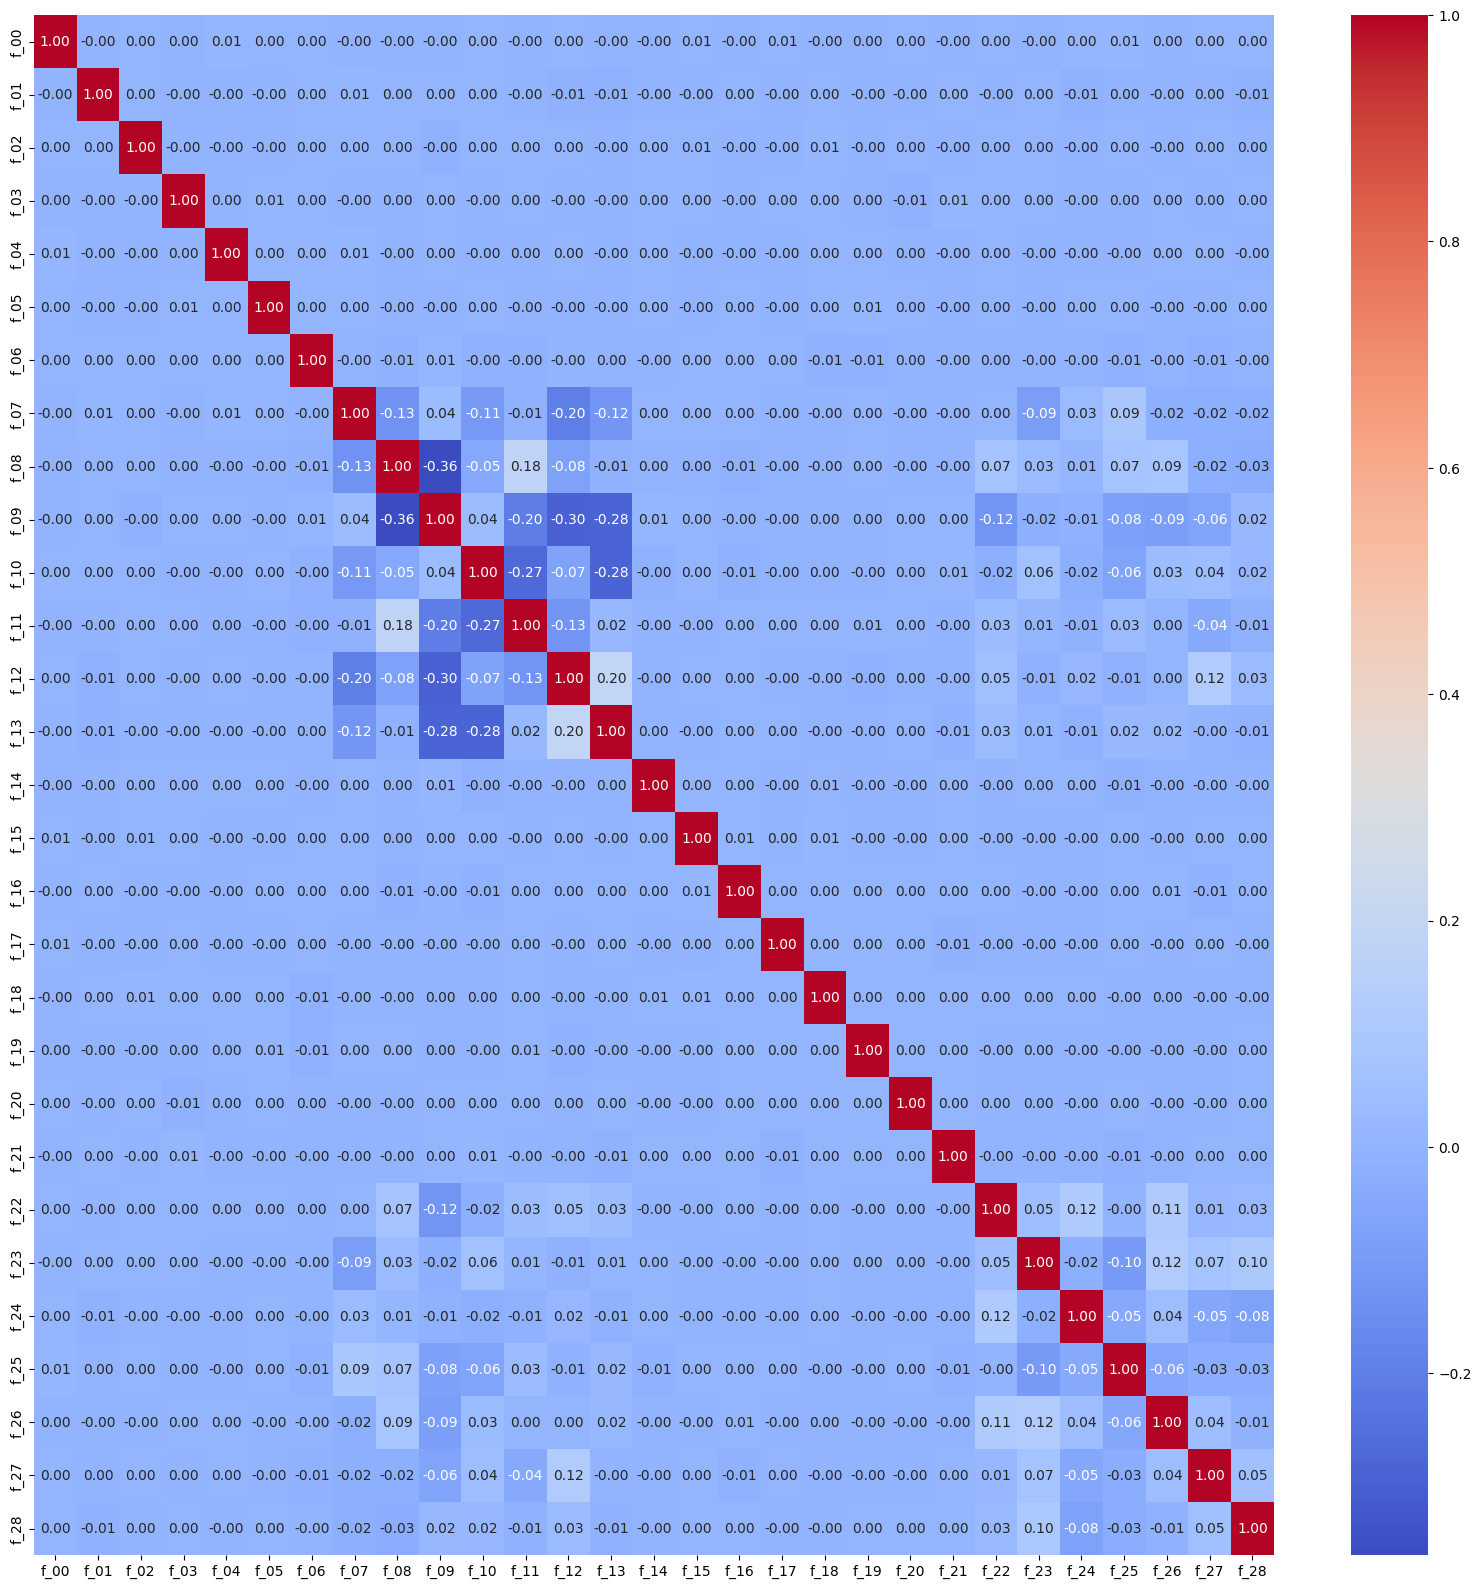

In [19]:
# Correlation tabel between features
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

### We then visualize histograms with kernel density estimation (KDE) to understand the distribution and characteristics of each feature in the dataset, which can inform further data analysis and model building steps.

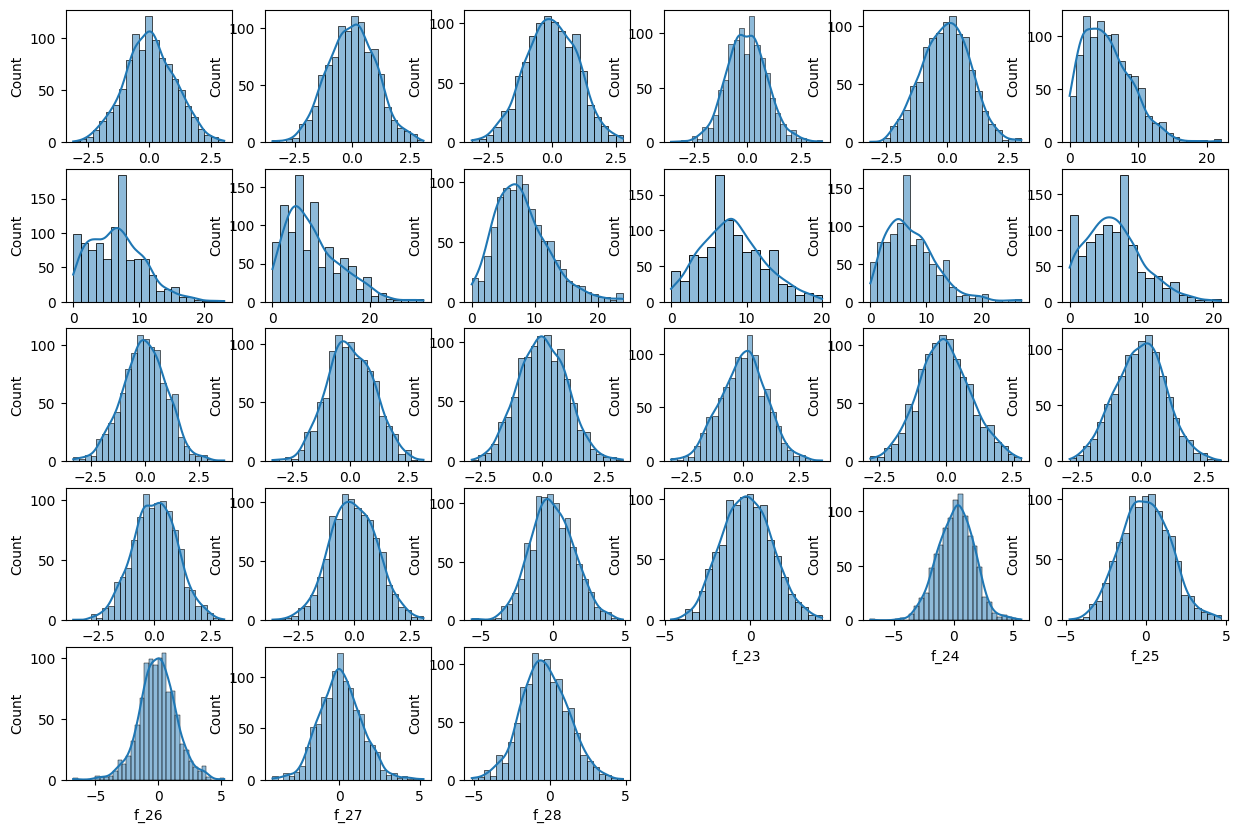

In [20]:
# Disable use_inf_as_na option to suppress warning messages
pd.set_option("use_inf_as_na", False)

# Suppress FutureWarning from Seaborn
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=(15,10))
columns = data.columns[2:]
for i in range(len(columns)):
    plt.subplot(5,6,i+1)
    p = sns.histplot(x=columns[i], data=data.sample(1000), stat='count', kde=True)

### From the analysis of the graph, it is determined that the most significant data is contained within the columns "f_07", "f_08", "f_09", "f_10", "f_11", "f_12", "f_13", "f_22", "f_23", "f_24", "f_25", "f_26", "f_27", "f_28"

# Preprocessing

In [21]:
# Feature that is not normal distribution mean that
# Take only the feature that is goo
# until f_28 is not normal distribution
data =  data[["f_07", "f_08", "f_09", "f_10", "f_11", "f_12", "f_13", "f_22", "f_23", "f_24", "f_25", "f_26", "f_27", "f_28"]]
data.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,2,13,14,5,13,6,6,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,2,3,6,4,6,16,9,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,5,11,5,8,9,3,11,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,6,2,13,8,9,6,4,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,8,7,5,3,1,13,11,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


### We use the elbow method to determine the optimal number of clusters for our dataset. This method involves plotting the variation explained as a function of the number of clusters and looking for an 'elbow' in the graph. The elbow point is where the rate of decrease in variation sharply changes, indicating that additional clusters beyond this point do not contribute significantly to explaining more variance in the data.

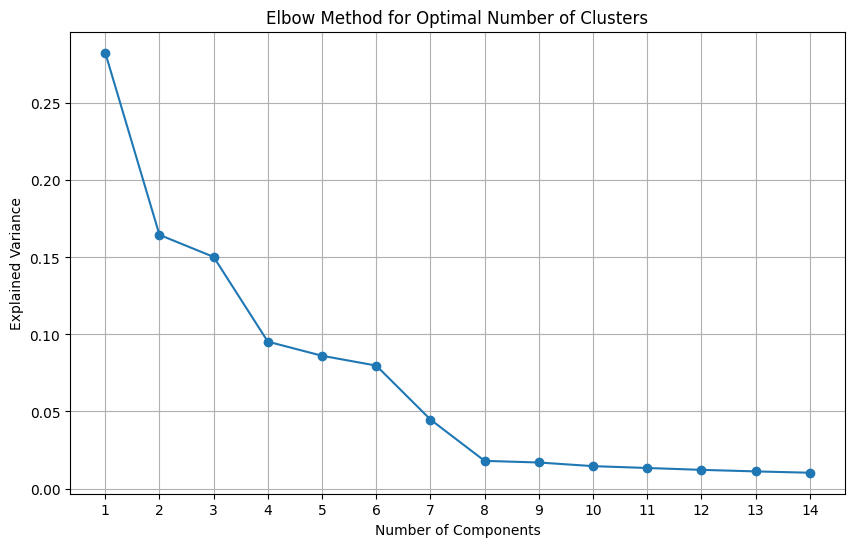

In [22]:
# Calculate the explained variance for each number of components
pca = PCA()
pca.fit(data)
explained_variance = pca.explained_variance_ratio_

# Displays an elbow plot with the x axis starting from 1
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(np.arange(1, len(explained_variance) + 1))  # Set ticks on the x axis starting from 1
plt.grid(True)
plt.show()

### From the graph, we got that the optimal number of components is 7

# Clustering

### We solve this challenge using Bayesian Gaussian Mixture model. This model was chosen due to its ability to model data that has complex and previously unknown cluster structures.

### We firstly normalized the data using Power Transformer to ensure that all features have the same scale. This is important as Gaussian Mixture models are highly sensitive to the scale of features.

In [23]:
# Standardize the data so that it has a mean of 0 var 1
# transformer = StandardScaler()
# transformer = MinMaxScaler()
transformer = PowerTransformer() # Use power transform
X_scaled = transformer.fit_transform(data)
X_scaled = pd.DataFrame(X_scaled, columns=data.columns)
X_scaled.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.977987,1.383372,1.039938,-0.567775,1.142180,-0.083596,0.086073,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-0.977987,-0.875405,-0.179925,-0.837020,-0.420725,1.725834,0.738456,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652
2,0.021718,1.017648,-0.394246,0.124844,0.296135,-0.928325,1.118063,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373
3,0.286548,-1.213526,0.917564,0.124844,0.296135,-0.083596,-0.434221,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682
4,0.756900,0.187543,-0.394246,-1.135381,-1.954502,1.271662,1.118063,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058


### The Bayesian Gaussian Mixture model was built with 7 components and a 'full' covariance type. These parameters were chosen based on initial data exploration and several iterations of trial and error.

In [24]:
data_scaled = X_scaled
# Add model bgmm
bgmm = BayesianGaussianMixture(n_components=7, covariance_type='full', init_params="random", random_state=0)
# Fit the data to the model
bgmm.fit(data_scaled)
# Predict the cluster data with model
predict_BGMM = bgmm.predict(data_scaled)
# Write the predicted result to csv file
pd.DataFrame({'Id': range(len(predict_BGMM)), 'Predicted': predict_BGMM}).set_index("Id").to_csv("/kaggle/working/submission.csv")

### After the model was trained, we used it to predict the cluster for each sample in the data. These predictions were then saved to a CSV file for submission.